In [68]:
import numpy as np
from numpy import linalg as LA
rng = np.random.default_rng
import matplotlib.pyplot as plt

## Fit a line using different error measures

- Generate synthetic data
- Find a line of best fit using
    - least squares
    - 1-norm
    - $\infty$-norm


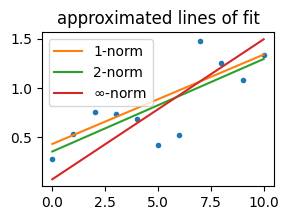

In [149]:
def line_error_1(error_vector):
    """compute error function using 1-norm"""
    return np.sum(np.abs(error_vector))

def line_error_inf(error_vector):
    """compute error function using inf-norm"""
    return np.max(np.abs(error_vector))

def line_error_2(error_vector):
    """compute error function using square of 2-norm"""
    return np.sum((error_vector)**2)

def generate_line_error(error_fcn,data):
    c10 = rng.uniform()*2-1
    c20 = rng.uniform()*0.3
    error_vec = data[:,1]-c10-c20*data[:,0]
    error0 = error_fcn(error_vec)
    return c10,c20,error0

def minimum_error_line(error_fcn,data):
    """use randomly generated coefficients to find an okay fit"""
    c1,c2,error = generate_line_error(error_fcn,data)
    for k1 in range(100000):
        c10,c20,error0 = generate_line_error(error_fcn,data)
        if error0<error:
            c1 = c10
            c2 = c20
            error = error0
    return c1, c2, error

rng = np.random.default_rng(seed=20)
data_length = 11
tvals = np.arange(data_length)
data = np.vstack((tvals, tvals*0.07 + rng.uniform(size=data_length))).T
data[2,1] = data[2,1] + 0.5
plt.figure(figsize=[3,2])
plt.plot(data[:,0],data[:,1],'.')
c1,c2,err = minimum_error_line(line_error_1,data)
plt.plot(data[:,0],c1 + data[:,0]*c2,label='1-norm')

c1,c2,err = minimum_error_line(line_error_2,data)
plt.plot(data[:,0],c1 + data[:,0]*c2,label='2-norm')
c1,c2,err = minimum_error_line(line_error_inf,data)
plt.plot(data[:,0],c1 + data[:,0]*c2,label='$\infty$-norm')
plt.gca().legend()
plt.title('approximated lines of fit')
plt.savefig('c04-line.png',dpi=150,bbox_inches="tight")

### Plot a less familiar basis function

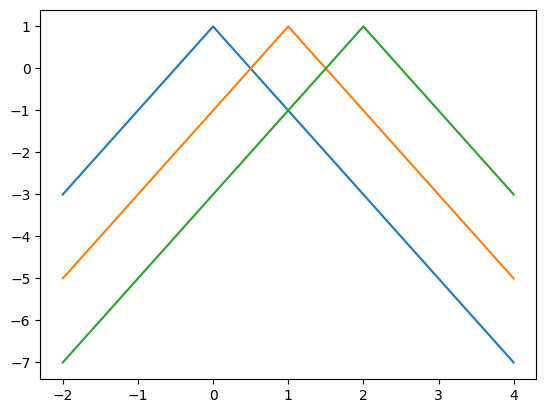

In [147]:
xvals = np.arange(-2,4.5,0.5)
delta = 0.5
plt.plot(xvals,1-np.abs(xvals)/delta)
plt.plot(xvals,1-np.abs(xvals-1)/delta)
plt.plot(xvals,1-np.abs(xvals-2)/delta)

## Explore matrix condition number

Follow Sauer section 2.3

Sauer section 2.3 Exercise 3:

Equation is from example 2.11
\begin{align}
x_1 + x_2 &= 2 \\
1.0001 x_1 + x_2 &= 2.0001 
\end{align}

Exact solution is $\left[\begin{array}{c} 1 \\1 \end{array}\right]$

Consider the following approximate solutions:
$\left[\begin{array}{c} -1 \\3 \end{array}\right]$, $\left[\begin{array}{c} 0 \\2 \end{array}\right]$, $\left[\begin{array}{c} 2 \\2 \end{array}\right]$, $\left[\begin{array}{c} -2 \\4 \end{array}\right]$, $\left[\begin{array}{c} -2 \\4.0001 \end{array}\right]$

In [50]:
def forward_backward_error(A, x, b, xa):
    """identify the forward and backward error and the error magnification 
        for Ax = b with approximate solution xa
    """
    backward = LA.norm(b - np.matmul(A,xa),np.inf)
    forward = LA.norm(x - xa, np.inf)
    relative_backward = backward/LA.norm(b)
    relative_forward = forward/LA.norm(x)
    magnification = relative_forward/relative_backward
    return forward, backward, magnification

def perturb_b_error(A,b):
    """identify the forward and backward error and the error magnification 
        for Ax = b when b is perturbed slightly
    """
    # elementwise multiplication of two vectors via *
    ba = rng.uniform(size=2)*b*0.001 + b
    xa = LA.solve(A,ba)
    x = LA.solve(A,b)
    backward = LA.norm(b - ba,np.inf)
    forward = LA.norm(x - xa, np.inf)
    relative_backward = backward/LA.norm(b)
    relative_forward = forward/LA.norm(x)
    magnification = relative_forward/relative_backward
    return forward, backward, magnification

In [37]:
A = np.array([[1, 1],[1.0001,1]])
x = np.array([1,1])
b = np.array([2,2.0001])
xalist = [np.array([-1,3.0001]),np.array([-1,3]),np.array([0,2]),np.array([2,2]),np.array([-2,4]),np.array([-2,4.0001])]
for xa in xalist:
    outf, outb, outm = forward_backward_error(A,x,b,xa)
    print('backward:', outb, ' forward:',outf,' magnification:',outm)

backward: 0.00010000000000021103  forward: 2.0001  magnification: 40003.00006241589
backward: 0.00020000000000020002  forward: 2.0  magnification: 20000.500006229842
backward: 0.00010000000000021103  forward: 1.0  magnification: 20000.500006207636
backward: 2.0000999999999993  forward: 1.0  magnification: 0.9999750015624145
backward: 0.000300000000000189  forward: 3.0  magnification: 20000.500006237242
backward: 0.00020000000000042206  forward: 3.0000999999999998  magnification: 30001.75003431176


In [55]:
for k1 in range(10):
    b = rng.uniform(size=2)
    outf, outb, outm = perturb_b_error(A,b)
    print('backward:', outb, ' forward:',outf,' magnification:',outm)

backward: 0.00045200276848100795  forward: 3.608665644850589  magnification: 0.6387959748414337
backward: 0.00010780422895195763  forward: 0.36214544327822296  magnification: 1.9893729421070323
backward: 0.0004560009480619742  forward: 3.228834162098792  magnification: 1.6034213193994566
backward: 0.0003457695013368012  forward: 1.1423629926309786  magnification: 1.0243961410662141
backward: 0.00014174160674712555  forward: 0.8348813117481768  magnification: 3.6720171438353892
backward: 0.0005421874851587738  forward: 3.009500781367933  magnification: 0.6955822980099793
backward: 0.000257821890510046  forward: 2.4593733512306244  magnification: 3.206839178797409
backward: 0.00010953809052349772  forward: 0.17173033730023235  magnification: 0.6404177130496276
backward: 0.0004825004965437474  forward: 4.568575751753997  magnification: 0.9774372613189013
backward: 0.00012349923052554224  forward: 1.1143781749451591  magnification: 0.7021470594716677


In [46]:
rng.uniform(size=2)*np.array([0.01,0])

array([0.00201965, 0.        ])

In [49]:
LA.cond(A)

40002.00007494105